**Procject :Apple Stock Market .

*first import the dataset


In [ ]:
import os
import kagglehub

In [ ]:
path = kagglehub.dataset_download("itzusama/apple-stock-market-data-2020-2024")


100%|██████████| 34.8k/34.8k [00:00<00:00, 38.7MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/itzusama/apple-stock-market-data-2020-2024/versions/1


In [ ]:
file_path = os.path.join(path, 'apple_stock_market_data.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

from scipy.stats import spearmanr

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data =pd.read_csv(r"/content/AAPL.csv")

In [ ]:
df=data.copy()

*** EDA :Exploratry Data Analysis

In [ ]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-01-02,72.79601287841797,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
2,2020-01-03,72.08828735351562,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
3,2020-01-06,72.66271209716797,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
4,2020-01-07,72.32096099853516,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000


This data is collected from Yahoo Finance.

This data is collected from 2020-01-01 to 2024-12-01.

This data is collected from Apple Inc.

This data have following features:

Open: The opening price of the stock on a given day.

High: The highest price of the stock on a given day.

Low: The lowest price of the stock on a given day.

Close: The closing price of the stock on a given day.

Volume: The total number of shares traded on a given day.

Adj Close: The adjusted closing price of the stock on a given day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1238 non-null   object
 1   Adj Close  1238 non-null   object
 2   Close      1238 non-null   object
 3   High       1238 non-null   object
 4   Low        1238 non-null   object
 5   Open       1238 non-null   object
 6   Volume     1238 non-null   object
dtypes: object(7)
memory usage: 67.8+ KB


In [ ]:
df.columns

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
df.describe().T

,count,unique,top,freq
Price,1238,1238,Ticker,1
Adj Close,1238,1223,139.75953674316406,2
Close,1238,1175,145.86000061035156,3
High,1238,1178,151.57000732421875,3
Low,1238,1188,147.67999267578125,3
Open,1238,1173,127.81999969482422,3
Volume,1238,1236,90956700,2


In [ ]:
df.isnull().sum()

,0
Price,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


DATA Cleaning

In [ ]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-01-02,72.79601287841797,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
2,2020-01-03,72.08828735351562,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
3,2020-01-06,72.66271209716797,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
4,2020-01-07,72.32096099853516,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000


In [ ]:
df=df.drop(index=0)
df    ## drop the first row of index

,Price,Adj Close,Close,High,Low,Open,Volume
1,2020-01-02,72.79601287841797,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
2,2020-01-03,72.08828735351562,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
3,2020-01-06,72.66271209716797,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
4,2020-01-07,72.32096099853516,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000
5,2020-01-08,73.48435974121094,75.79750061035156,76.11000061035156,74.29000091552734,74.29000091552734,132079200
...,...,...,...,...,...,...,...
1233,2024-11-22,229.8699951171875,229.8699951171875,230.72000122070312,228.05999755859375,228.05999755859375,38168300
1234,2024-11-25,232.8699951171875,232.8699951171875,233.25,229.74000549316406,231.4600067138672,90152800
1235,2024-11-26,235.05999755859375,235.05999755859375,235.57000732421875,233.3300018310547,233.3300018310547,45986200
1236,2024-11-27,234.92999267578125,234.92999267578125,235.69000244140625,233.80999755859375,234.47000122070312,33498400


In [ ]:
df.reset_index(drop=True, inplace=True)     ### Resetting index after dropping rows
df

,Price,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,72.79601287841797,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400
1,2020-01-03,72.08828735351562,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800
2,2020-01-06,72.66271209716797,74.94999694824219,74.98999786376953,73.1875,73.44750213623047,118387200
3,2020-01-07,72.32096099853516,74.59750366210938,75.2249984741211,74.37000274658203,74.95999908447266,108872000
4,2020-01-08,73.48435974121094,75.79750061035156,76.11000061035156,74.29000091552734,74.29000091552734,132079200
...,...,...,...,...,...,...,...
1232,2024-11-22,229.8699951171875,229.8699951171875,230.72000122070312,228.05999755859375,228.05999755859375,38168300
1233,2024-11-25,232.8699951171875,232.8699951171875,233.25,229.74000549316406,231.4600067138672,90152800
1234,2024-11-26,235.05999755859375,235.05999755859375,235.57000732421875,233.3300018310547,233.3300018310547,45986200
1235,2024-11-27,234.92999267578125,234.92999267578125,235.69000244140625,233.80999755859375,234.47000122070312,33498400


In [ ]:
df.rename(columns={'Price': 'Date'}, inplace=True)

In [ ]:
print(df.isnull().sum())

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1237 non-null   object
 1   Adj Close  1237 non-null   object
 2   Close      1237 non-null   object
 3   High       1237 non-null   object
 4   Low        1237 non-null   object
 5   Open       1237 non-null   object
 6   Volume     1237 non-null   object
dtypes: object(7)
memory usage: 67.8+ KB


In [ ]:
# Convert price columns to float
price_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open']
for col in price_columns:
    df[col] = pd.to_numeric(df[col])

In [ ]:
#convert volume colume to int
df['Volume'] = pd.to_numeric(df['Volume'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,1237.0,1.506986e+02,4.051183e+01,5.450975e+01,1.259651e+02,1.498923e+02,1.761339e+02,2.373300e+02
Close,1237.0,1.524924e+02,3.995191e+01,5.609250e+01,1.289100e+02,1.517600e+02,1.775700e+02,2.373300e+02
High,1237.0,1.540450e+02,4.009543e+01,5.712500e+01,1.303900e+02,1.537200e+02,1.792300e+02,2.378100e+02
Low,1237.0,1.507749e+02,3.975454e+01,5.315250e+01,1.270000e+02,1.501000e+02,1.758200e+02,2.344500e+02
Open,1237.0,1.523497e+02,3.992817e+01,5.702000e+01,1.287600e+02,1.514500e+02,1.771400e+02,2.364800e+02
Volume,1237.0,9.132092e+07,5.329896e+07,2.404830e+07,5.609490e+07,7.685710e+07,1.082753e+08,4.265100e+08


In [ ]:
df[["Close","Adj Close"]].describe()

,Close,Adj Close
count,1237.000000,1237.000000
mean,152.492393,150.698597
std,39.951914,40.511833
min,56.092499,54.509754
25%,128.910004,125.965073
50%,151.759995,149.892334
75%,177.570007,176.133926
max,237.330002,237.330002


<Axes: >

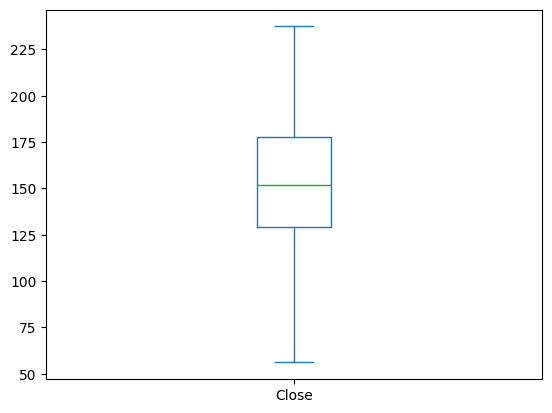

In [ ]:
df["Close"].plot.box()

<Axes: ylabel='Frequency'>

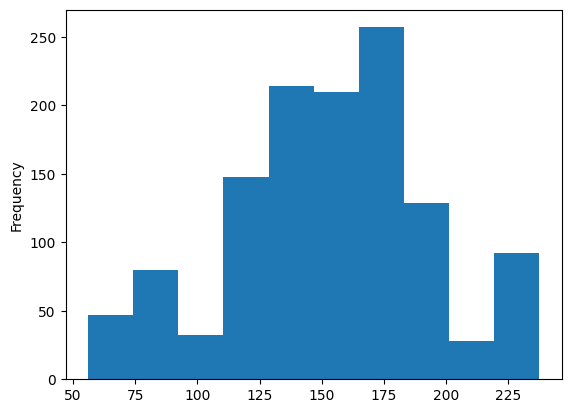

In [ ]:
df["Close"].plot.hist()

In [ ]:
pd.crosstab(df["Close"],df["Date"]).T

Close,56.092499,57.310001,60.227501,60.352501,60.552502,61.195000,61.232498,61.380001,61.667500,61.720001,...,233.669998,233.850006,234.399994,234.820007,234.929993,235.000000,235.059998,235.860001,236.479996,237.330002
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-11-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0



LinearRegression Model



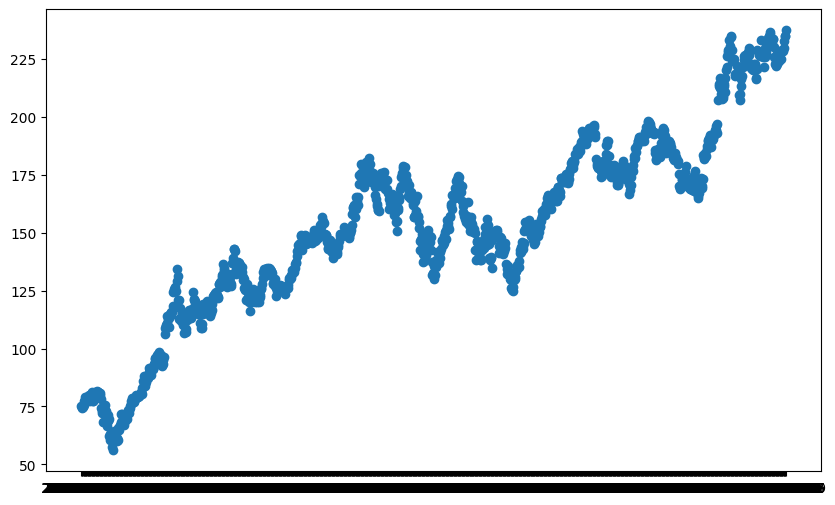

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Date"], df["Close"])
plt.show()

In [ ]:
model=LinearRegression()

In [ ]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the 'Date' column
df['Date_Ordinal'] = df['Date'].apply(lambda date: date.toordinal())

# Drop the original 'Date' column and use 'Date_Ordinal' instead
X = df[['Date_Ordinal', 'Open', 'High', 'Low', 'Adj Close', 'Volume']]

y = df["Close"]

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
pred=model.predict(X)

In [ ]:
c=model.intercept_

In [ ]:
m=model.coef_

In [ ]:
m,c

(array([-2.44262365e-03, -5.28012783e-02,  1.36048631e-01,  3.06381440e-03,
         9.25991717e-01, -3.64147674e-09]),
 1803.3477619331718)

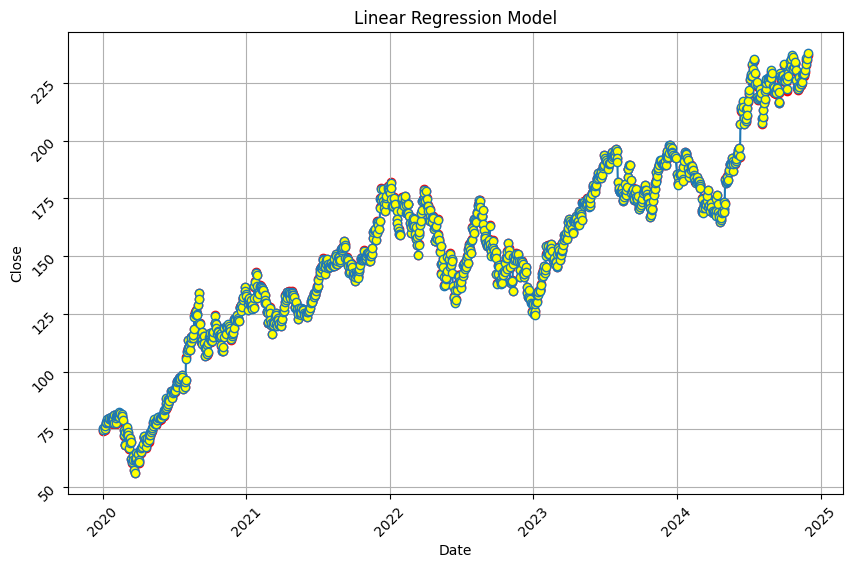

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["Date"],pred,marker="o",markerfacecolor="yellow",label="predicted point")
plt.scatter(df["Date"],df["Close"],marker="o",color="red",label="Acutal point")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Linear Regression Model")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
np.mean(np.square(y-pred))

0.07145813955899549

In [ ]:
mean_squared_error(y,pred)

0.07145813955899549

In [ ]:
df.corr()["Close"]

,Close
Date,0.908588
Adj Close,0.999879
Close,1.000000
High,0.999315
Low,0.999317
Open,0.998483
Volume,-0.640067
Date_Ordinal,0.908588


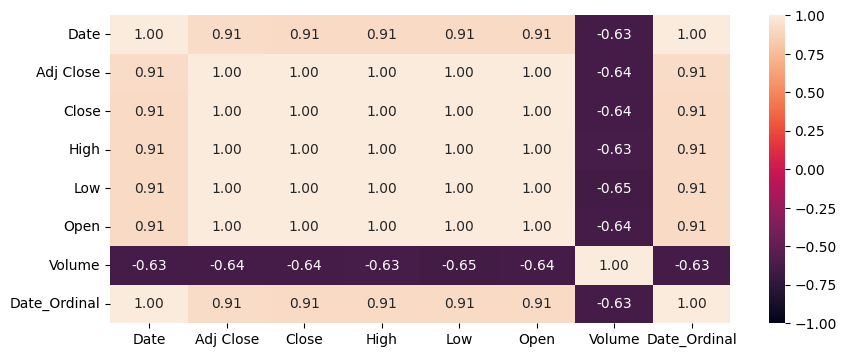

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1, fmt=".2f")
plt.show()

In [ ]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal
0,2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400,737426
1,2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800,737427
2,2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200,737430
3,2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000,737431
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,737432


In [ ]:
stats_val,p_val=spearmanr(df["Close"],df["Open"])

In [ ]:
alpha=0.05

In [ ]:
if p_val > alpha:
  print("Null hypothesis is accepted : The column Open and Close are strongly correlated")
else:
  print("Null hypothesis is rejected : The column Open and Close are not strongly correlated")

Null hypothesis is rejected : The column Open and Close are not strongly correlated


In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X

array([[-1.72907391, -1.96155705, -1.96847674, -1.9371009 , -1.92373647,
         0.82885939],
       [-1.72714502, -1.95585699, -1.96860162, -1.92885953, -1.94121313,
         1.03236778],
       [-1.72135836, -1.97690319, -1.97246893, -1.95245128, -1.92702822,
         0.50802548],
       ...,
       [ 1.72363498,  2.02896984,  2.03409649,  2.0774597 ,  2.08323133,
        -0.85091819],
       [ 1.72556387,  2.05753265,  2.03709044,  2.08953857,  2.08002098,
        -1.08531022],
       [ 1.72942164,  2.06605129,  2.08998556,  2.09356499,  2.13928711,
        -1.17947771]])

In [ ]:
error=[]
for i in range(1,11):
  m=KMeans(n_clusters=i)
  m.fit(X)
  error.append(m.inertia_)

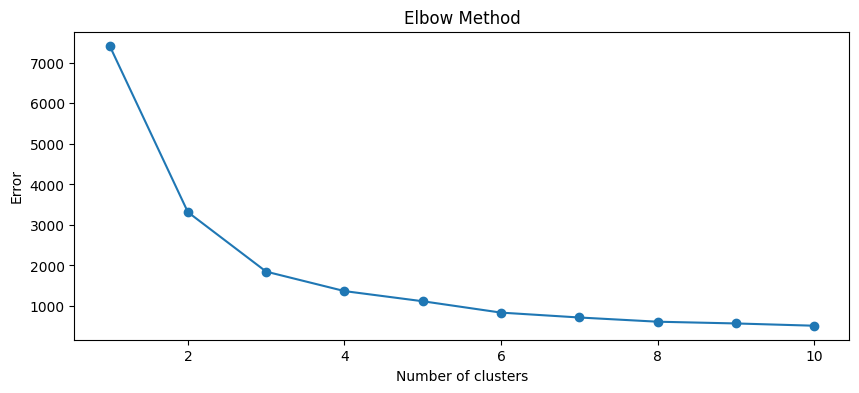

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(1,11),error,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.title("Elbow Method")
plt.show()

In [ ]:
model=KMeans(n_clusters=3)

In [ ]:
model.fit(X)

KMeans(n_clusters=3)

In [ ]:
model.predict(X)

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
df["Cluster"]=model.predict(X)

In [ ]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal,Cluster
0,2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400,737426,1
1,2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800,737427,1
2,2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200,737430,1
3,2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000,737431,1
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,737432,1


In [ ]:
df["Cluster"].value_counts()

,count
Cluster,
0,610
2,399
1,228


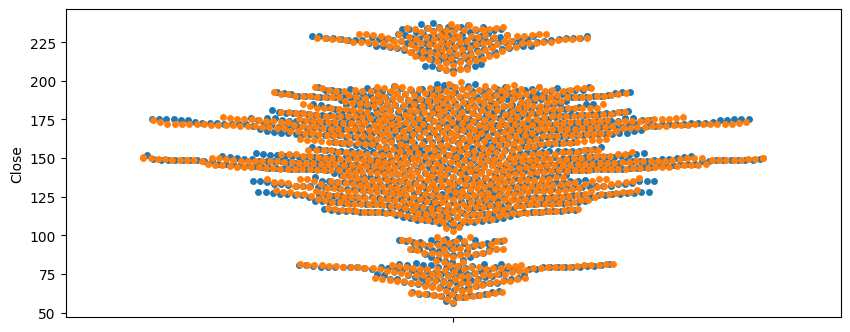

In [ ]:
plt.figure(figsize=(10,4))
sns.swarmplot(df,y="Close")
sns.swarmplot(df,y="Open")
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pr=model.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pr)

In [ ]:
mse

0.06717788505341053

In [ ]:
r2_score(y_test,y_pr)

0.9999580487847178

In [ ]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal,Cluster
0,2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400,737426,1
1,2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800,737427,1
2,2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200,737430,1
3,2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000,737431,1
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,737432,1


In [ ]:
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df = df.set_index('Date')

In [ ]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal,Cluster
Date,,,,,,,,
2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400,737426,1
2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800,737427,1
2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200,737430,1
2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000,737431,1
2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,737432,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2020-01-02 to 2024-11-29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     1237 non-null   float64
 1   Close         1237 non-null   float64
 2   High          1237 non-null   float64
 3   Low           1237 non-null   float64
 4   Open          1237 non-null   float64
 5   Volume        1237 non-null   int64  
 6   Date_Ordinal  1237 non-null   int64  
 7   Cluster       1237 non-null   int32  
dtypes: float64(5), int32(1), int64(2)
memory usage: 82.1 KB


In [ ]:
df.loc["2022"]

,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal,Cluster
Date,,,,,,,,
2022-01-03,179.076569,182.009995,182.880005,177.710007,177.830002,104487900,738158,0
2022-01-04,176.803818,179.699997,182.940002,179.119995,182.630005,99310400,738159,0
2022-01-05,172.100845,174.919998,180.169998,174.639999,179.610001,94537600,738160,0
2022-01-06,169.227921,172.000000,175.300003,171.639999,172.699997,96904000,738161,0
2022-01-07,169.395172,172.169998,174.139999,171.029999,172.889999,86709100,738162,0
...,...,...,...,...,...,...,...,...
2022-12-23,130.487778,131.860001,132.419998,129.639999,130.919998,63814900,738512,0
2022-12-27,128.676834,130.029999,131.410004,128.720001,131.380005,69007800,738516,0
2022-12-28,124.728371,126.040001,131.029999,125.870003,129.669998,85438400,738517,0


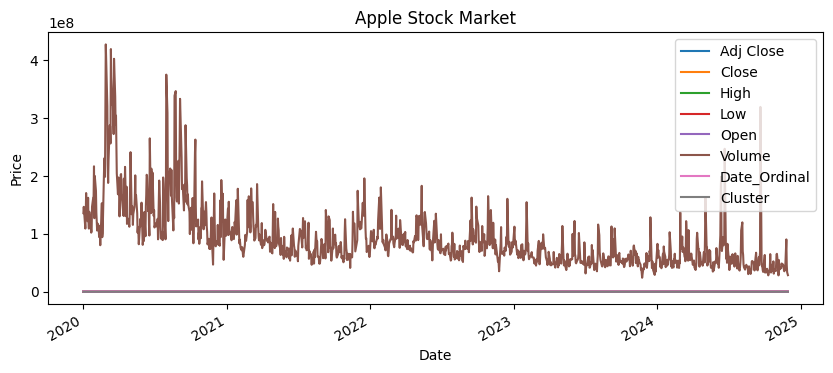

In [ ]:
df.plot(figsize=(10,4),title="Apple Stock Market",ylabel="Price")
plt.xticks()
plt.grid(axis="y",ls="")
plt.show()

In [ ]:
result=seasonal_decompose(df["Close"],model="additive",period=365)

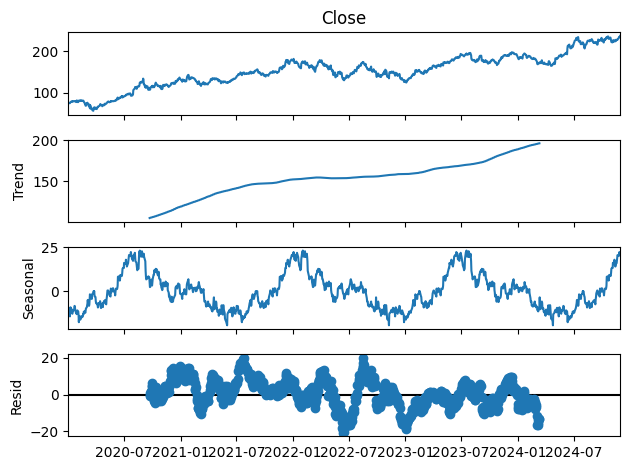

In [ ]:
result.plot()
plt.show()

In [ ]:
train=df.loc["2020":"2022"]
test=df.loc["2023":]

In [ ]:
train

,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal,Cluster
Date,,,,,,,,
2020-01-02,72.796013,75.087502,75.150002,73.797501,74.059998,135480400,737426,1
2020-01-03,72.088287,74.357498,75.144997,74.125000,74.287498,146322800,737427,1
2020-01-06,72.662712,74.949997,74.989998,73.187500,73.447502,118387200,737430,1
2020-01-07,72.320961,74.597504,75.224998,74.370003,74.959999,108872000,737431,1
2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,737432,1
...,...,...,...,...,...,...,...,...
2022-12-23,130.487778,131.860001,132.419998,129.639999,130.919998,63814900,738512,0
2022-12-27,128.676834,130.029999,131.410004,128.720001,131.380005,69007800,738516,0
2022-12-28,124.728371,126.040001,131.029999,125.870003,129.669998,85438400,738517,0


In [ ]:
test

,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal,Cluster
Date,,,,,,,,
2023-01-03,123.768448,125.070000,130.899994,124.169998,130.279999,112117500,738523,0
2023-01-04,125.045044,126.360001,128.660004,125.080002,126.889999,89113600,738524,0
2023-01-05,123.718971,125.019997,127.769997,124.760002,127.129997,80962700,738525,0
2023-01-06,128.271103,129.619995,130.289993,124.889999,126.010002,87754700,738526,0
2023-01-09,128.795593,130.149994,133.410004,129.889999,130.470001,70790800,738529,0
...,...,...,...,...,...,...,...,...
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300,739212,2
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,739215,2
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,739216,2


In [ ]:
train.min(),train.max()

(Adj Close       5.450975e+01
 Close           5.609250e+01
 High            5.712500e+01
 Low             5.315250e+01
 Open            5.702000e+01
 Volume          3.519590e+07
 Date_Ordinal    7.374260e+05
 Cluster         0.000000e+00
 dtype: float64,
 Adj Close       1.790766e+02
 Close           1.820100e+02
 High            1.829400e+02
 Low             1.791200e+02
 Open            1.826300e+02
 Volume          4.265100e+08
 Date_Ordinal    7.385190e+05
 Cluster         1.000000e+00
 dtype: float64)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaler_train=scaler.transform(train)

In [ ]:
scaler_test=scaler.transform(test)

In [ ]:
scaler_train

array([[1.46798799e-01, 1.50852768e-01, 1.43265916e-01, ...,
        2.56276224e-01, 0.00000000e+00, 1.00000000e+00],
       [1.41117305e-01, 1.45055294e-01, 1.43226136e-01, ...,
        2.83983889e-01, 9.14913083e-04, 1.00000000e+00],
       [1.45728684e-01, 1.49760747e-01, 1.41994178e-01, ...,
        2.12594691e-01, 3.65965233e-03, 1.00000000e+00],
       ...,
       [5.63702434e-01, 5.55502647e-01, 5.87410065e-01, ...,
        1.28394300e-01, 9.98170174e-01, 0.00000000e+00],
       [5.92063475e-01, 5.83854542e-01, 5.83038543e-01, ...,
        1.03517353e-01, 9.99085087e-01, 0.00000000e+00],
       [5.94605610e-01, 5.86395826e-01, 5.78826019e-01, ...,
        1.06917435e-01, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
scaler_test

array([[ 0.55599635,  0.54779918,  0.58637676, ...,  0.19657252,
         1.00365965,  0.        ],
       [ 0.56624463,  0.55804399,  0.56857292, ...,  0.13778624,
         1.00457457,  0.        ],
       [ 0.55559916,  0.54740207,  0.56149899, ...,  0.11695669,
         1.00548948,  0.        ],
       ...,
       [ 1.44942491,  1.42130764,  1.41831263, ...,  0.02757452,
         1.63769442,  2.        ],
       [ 1.44838125,  1.42027518,  1.41926638, ..., -0.00433795,
         1.63860933,  2.        ],
       [ 1.46764809,  1.43933535,  1.43611647, ..., -0.01715885,
         1.64043916,  2.        ]])

In [ ]:
generator=TimeseriesGenerator(scaler_train,scaler_train,length=30,batch_size=1)

In [ ]:
inp,out=generator[0]

In [ ]:
inp

array([[[1.46798799e-01, 1.50852768e-01, 1.43265916e-01, 1.63891490e-01,
         1.35657961e-01, 2.56276224e-01, 0.00000000e+00, 1.00000000e+00],
        [1.41117305e-01, 1.45055294e-01, 1.43226136e-01, 1.66491362e-01,
         1.37469130e-01, 2.83983889e-01, 9.14913083e-04, 1.00000000e+00],
        [1.45728684e-01, 1.49760747e-01, 1.41994178e-01, 1.59048966e-01,
         1.30781794e-01, 2.12594691e-01, 3.65965233e-03, 1.00000000e+00],
        [1.42985167e-01, 1.46961348e-01, 1.43862005e-01, 1.68436330e-01,
         1.42823008e-01, 1.88278674e-01, 4.57456542e-03, 1.00000000e+00],
        [1.52324723e-01, 1.56491373e-01, 1.50896159e-01, 1.67801231e-01,
         1.37489052e-01, 2.47584485e-01, 5.48947850e-03, 1.00000000e+00],
        [1.64854963e-01, 1.69277528e-01, 1.62798536e-01, 1.85742385e-01,
         1.57551122e-01, 3.44767797e-01, 6.40439158e-03, 1.00000000e+00],
        [1.66217044e-01, 1.70667291e-01, 1.67249556e-01, 1.89810870e-01,
         1.64238519e-01, 2.69473806e-01, 7.31

In [ ]:
out

array([[0.19616396, 0.19969428, 0.19369711, 0.21878661, 0.19238115,
        0.11478682, 0.03934126, 1.        ]])

In [ ]:
inp2,out2=generator[1]

In [ ]:
inp

array([[[1.46798799e-01, 1.50852768e-01, 1.43265916e-01, 1.63891490e-01,
         1.35657961e-01, 2.56276224e-01, 0.00000000e+00, 1.00000000e+00],
        [1.41117305e-01, 1.45055294e-01, 1.43226136e-01, 1.66491362e-01,
         1.37469130e-01, 2.83983889e-01, 9.14913083e-04, 1.00000000e+00],
        [1.45728684e-01, 1.49760747e-01, 1.41994178e-01, 1.59048966e-01,
         1.30781794e-01, 2.12594691e-01, 3.65965233e-03, 1.00000000e+00],
        [1.42985167e-01, 1.46961348e-01, 1.43862005e-01, 1.68436330e-01,
         1.42823008e-01, 1.88278674e-01, 4.57456542e-03, 1.00000000e+00],
        [1.52324723e-01, 1.56491373e-01, 1.50896159e-01, 1.67801231e-01,
         1.37489052e-01, 2.47584485e-01, 5.48947850e-03, 1.00000000e+00],
        [1.64854963e-01, 1.69277528e-01, 1.62798536e-01, 1.85742385e-01,
         1.57551122e-01, 3.44767797e-01, 6.40439158e-03, 1.00000000e+00],
        [1.66217044e-01, 1.70667291e-01, 1.67249556e-01, 1.89810870e-01,
         1.64238519e-01, 2.69473806e-01, 7.31

In [ ]:
out

array([[0.19616396, 0.19969428, 0.19369711, 0.21878661, 0.19238115,
        0.11478682, 0.03934126, 1.        ]])

In [ ]:
inp.shape

(1, 30, 8)

In [ ]:
out.shape

(1, 8)

In [ ]:
model=Sequential([
    LSTM(128,input_shape=(30,8),return_sequences=True),
    Dense(8)
])


In [ ]:
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit(generator,epochs=10)

Epoch 1/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 0.0390
Epoch 2/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.0113
Epoch 3/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 0.0115
Epoch 4/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0105
Epoch 5/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0109
Epoch 6/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0106
Epoch 7/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0094
Epoch 8/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0100
Epoch 9/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 0.0098
Epoch 10/10
726/726 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.0082


In [ ]:
last_train_batch=scaler_train[-30:]

In [ ]:
last_train_batch

array([[0.75976721, 0.75150401, 0.74995028, 0.7382658 , 0.7118063 ,
        0.11549162, 0.96065874, 0.        ],
       [0.76429535, 0.75603072, 0.75964706, 0.76859114, 0.75861789,
        0.1012836 , 0.96157365, 0.        ],
       [0.73823825, 0.72998192, 0.74112779, 0.75072939, 0.74150147,
        0.06012612, 0.96431839, 0.        ],
       [0.75547719, 0.74721542, 0.74152523, 0.74445787, 0.72534035,
        0.04244212, 0.9652333 , 0.        ],
       [0.76254784, 0.75428365, 0.75273219, 0.76358982, 0.735849  ,
        0.05904592, 0.96614822, 0.        ],
       [0.73903263, 0.73077614, 0.72928509, 0.74596621, 0.7267733 ,
        0.        , 0.96797804, 0.        ],
       [0.7081294 , 0.6998829 , 0.71148112, 0.71627609, 0.70153647,
        0.08701475, 0.97072278, 0.        ],
       [0.68389943, 0.67566067, 0.69693594, 0.69222228, 0.69476944,
        0.12411487, 0.97163769, 0.        ],
       [0.73839713, 0.73014079, 0.72801335, 0.69380996, 0.67176173,
        0.19469015, 0.972552

In [ ]:
last_train_batch=last_train_batch.reshape((1,30,8))

In [ ]:
last_train_batch

array([[[0.75976721, 0.75150401, 0.74995028, 0.7382658 , 0.7118063 ,
         0.11549162, 0.96065874, 0.        ],
        [0.76429535, 0.75603072, 0.75964706, 0.76859114, 0.75861789,
         0.1012836 , 0.96157365, 0.        ],
        [0.73823825, 0.72998192, 0.74112779, 0.75072939, 0.74150147,
         0.06012612, 0.96431839, 0.        ],
        [0.75547719, 0.74721542, 0.74152523, 0.74445787, 0.72534035,
         0.04244212, 0.9652333 , 0.        ],
        [0.76254784, 0.75428365, 0.75273219, 0.76358982, 0.735849  ,
         0.05904592, 0.96614822, 0.        ],
        [0.73903263, 0.73077614, 0.72928509, 0.74596621, 0.7267733 ,
         0.        , 0.96797804, 0.        ],
        [0.7081294 , 0.6998829 , 0.71148112, 0.71627609, 0.70153647,
         0.08701475, 0.97072278, 0.        ],
        [0.68389943, 0.67566067, 0.69693594, 0.69222228, 0.69476944,
         0.12411487, 0.97163769, 0.        ],
        [0.73839713, 0.73014079, 0.72801335, 0.69380996, 0.67176173,
         0.

In [ ]:
model.predict(last_train_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


array([[0.78340095, 0.77905667, 0.80657834, 0.78996325, 0.7727449 ,
        0.11108388, 0.9270136 , 0.00846779],
       [0.74208975, 0.74230784, 0.76242054, 0.7585696 , 0.73402774,
        0.1188138 , 0.98933095, 0.03320836],
       [0.7193545 , 0.72361183, 0.73291945, 0.73646224, 0.7104249 ,
        0.12420268, 0.99811894, 0.04470926],
       [0.71900225, 0.72390616, 0.73112303, 0.7330831 , 0.70891094,
        0.13012853, 0.994068  , 0.04736444],
       [0.72291714, 0.7283179 , 0.73619056, 0.73443687, 0.71269345,
        0.13513842, 0.98758256, 0.05114546],
       [0.7191509 , 0.72373366, 0.7303543 , 0.7275181 , 0.7082765 ,
        0.1333347 , 0.98394084, 0.05147705],
       [0.70681465, 0.7095405 , 0.71882623, 0.71259034, 0.6949961 ,
        0.13228151, 0.9858865 , 0.0546366 ],
       [0.697083  , 0.69779533, 0.709347  , 0.70058966, 0.684203  ,
        0.13228375, 0.98491794, 0.05792676],
       [0.7037818 , 0.7028031 , 0.7210605 , 0.70722365, 0.6908374 ,
        0.13836361, 0.980380

In [ ]:
scaler_test[0]

array([0.55599635, 0.54779918, 0.58637676, 0.56377638, 0.58323379,
       0.19657252, 1.00365965, 0.        ])

In [ ]:
test_predictions=[]
first_eval_batch=scaler_train[-30:]
current_batch=first_eval_batch.reshape((1,30,8))

In [ ]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)

    # Get the last prediction from current_pred (assuming it's shape (30, 8))
    current_pred = current_pred[-1]  # Select the last prediction

    # Reshape to (1, 8)
    current_pred = current_pred.reshape(1, 8)

    # Remove the oldest timestep and append the new prediction
    current_batch = np.concatenate([current_batch[:, 1:, :], current_pred.reshape(1, 1, 8)], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

In [ ]:
test_predictions

[array([[0.78340095, 0.77905667, 0.80657834, 0.78996325, 0.7727449 ,
         0.11108388, 0.9270136 , 0.00846779],
        [0.74208975, 0.74230784, 0.76242054, 0.7585696 , 0.73402774,
         0.1188138 , 0.98933095, 0.03320836],
        [0.7193545 , 0.72361183, 0.73291945, 0.73646224, 0.7104249 ,
         0.12420268, 0.99811894, 0.04470926],
        [0.71900225, 0.72390616, 0.73112303, 0.7330831 , 0.70891094,
         0.13012853, 0.994068  , 0.04736444],
        [0.72291714, 0.7283179 , 0.73619056, 0.73443687, 0.71269345,
         0.13513842, 0.98758256, 0.05114546],
        [0.7191509 , 0.72373366, 0.7303543 , 0.7275181 , 0.7082765 ,
         0.1333347 , 0.98394084, 0.05147705],
        [0.70681465, 0.7095405 , 0.71882623, 0.71259034, 0.6949961 ,
         0.13228151, 0.9858865 , 0.0546366 ],
        [0.697083  , 0.69779533, 0.709347  , 0.70058966, 0.684203  ,
         0.13228375, 0.98491794, 0.05792676],
        [0.7037818 , 0.7028031 , 0.7210605 , 0.70722365, 0.6908374 ,
         0.

In [ ]:
test

,Adj Close,Close,High,Low,Open,Volume,Date_Ordinal,Cluster
Date,,,,,,,,
2023-01-03,123.768448,125.070000,130.899994,124.169998,130.279999,112117500,738523,0
2023-01-04,125.045044,126.360001,128.660004,125.080002,126.889999,89113600,738524,0
2023-01-05,123.718971,125.019997,127.769997,124.760002,127.129997,80962700,738525,0
2023-01-06,128.271103,129.619995,130.289993,124.889999,126.010002,87754700,738526,0
2023-01-09,128.795593,130.149994,133.410004,129.889999,130.470001,70790800,738529,0
...,...,...,...,...,...,...,...,...
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300,739212,2
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800,739215,2
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200,739216,2


In [ ]:
# Reshape test_predictions before inverse transform
true_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 8))

In [ ]:
true_predictions

array([[1.52095505e+02, 1.54189362e+02, 1.58604660e+02, ...,
        7.86645920e+07, 7.38439250e+05, 8.46779346e-03],
       [1.46949509e+02, 1.49562042e+02, 1.53048950e+02, ...,
        8.16894160e+07, 7.38507375e+05, 3.32083628e-02],
       [1.44117462e+02, 1.47207886e+02, 1.49337265e+02, ...,
        8.37981600e+07, 7.38516938e+05, 4.47092578e-02],
       ...,
       [1.42607529e+02, 1.44789841e+02, 1.46963318e+02, ...,
        1.01925096e+08, 7.37999375e+05, 1.13672197e-01],
       [1.42604858e+02, 1.44786606e+02, 1.46959579e+02, ...,
        1.01925752e+08, 7.37999312e+05, 1.13674507e-01],
       [1.42602936e+02, 1.44784256e+02, 1.46956894e+02, ...,
        1.01926168e+08, 7.37999312e+05, 1.13675483e-01]], dtype=float32)

In [ ]:
true_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 8))
adj_close_predictions = true_predictions[:, 0]

# Ensure adj_close_predictions has the same length as the test DataFrame
adj_close_predictions = adj_close_predictions[:len(test)]  # Trim to match test length

# Now assign these predictions to the 'Adj Close' column of the test DataFrame
test["Adj Close"] = adj_close_predictions

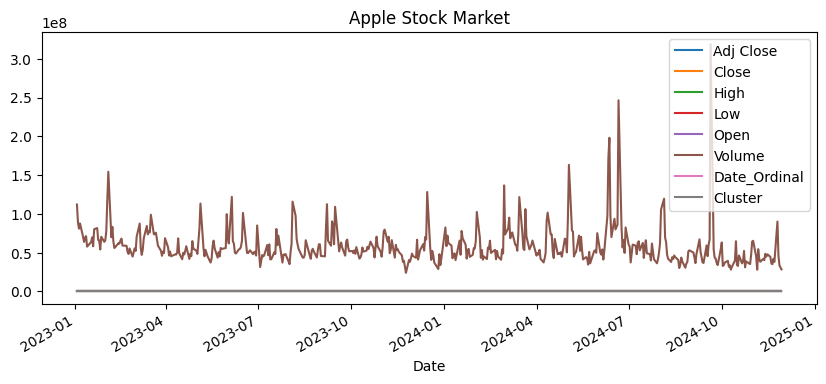

In [ ]:
test.plot(figsize=(10,4),title="Apple Stock Market")
plt.show()

In [ ]:
rmse=mean_squared_error(test["Adj Close"],test["Close"],squared=False)

In [ ]:
rmse

53.865816950763836

In [ ]:
test.mean()

,0
Adj Close,1.401902e+02
Close,1.873542e+02
High,1.888622e+02
Low,1.856043e+02
Open,1.871127e+02
Volume,5.867445e+07
Date_Ordinal,7.388716e+05
Cluster,1.659044e+00


In [ ]:
lower=test["Adj Close"].mean()-rmse
upper=test["Adj Close"].mean()+rmse

In [ ]:
lower,upper

(86.32436859611116, 194.05600249763884)